In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
""" Data Description
Gender- Male='M',Female='F'
Secondary Education percentage- 10th Grade
Board of Education ssc-b - Central/ Others
Higher Secondary Education percentage- 12th Grade
Board of Education hsc-b - Central/ Others
Specialization in Higher Secondary Education
Degree Percentage
Under Graduation(Degree type)- Field of degree education
Work Experience Yes,No
Under Graduation(Degree type)- Field of degree education
Work Experience
Employability test percentage ( conducted by college)
Post Graduation(MBA)- Specialization
MBA percentage(mba_p)
Status of placement- Placed/Not placed
salary
"""

" Data Description\nGender- Male='M',Female='F'\nSecondary Education percentage- 10th Grade\nBoard of Education ssc-b - Central/ Others\nHigher Secondary Education percentage- 12th Grade\nBoard of Education hsc-b - Central/ Others\nSpecialization in Higher Secondary Education\nDegree Percentage\nUnder Graduation(Degree type)- Field of degree education\nWork Experience Yes,No\nUnder Graduation(Degree type)- Field of degree education\nWork Experience\nEmployability test percentage ( conducted by college)\nPost Graduation(MBA)- Specialization\nMBA percentage(mba_p)\nStatus of placement- Placed/Not placed\nsalary\n"

# Questions

In [3]:
# Which factor influenced a candidate in getting placed?
# Does percentage matters for one to get placed?
# Which degree specialization is much demanded by corporate?
# Play with the data conducting all statistical tests.

In [4]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [5]:
df.shape

(215, 15)

In [6]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
df.drop(['sl_no','salary'],axis=1,inplace=True)
df['status'].replace(['Not Placed','Placed'],[0,1],inplace=True)

In [9]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [10]:
df.ssc_b.replace({'Central':0,'Others':1},inplace=True)
df.hsc_b.replace({'Central':0,'Others':1},inplace=True)
df.hsc_s.replace({'Commerce':0,'Science':1,'Arts':2},inplace=True)
df.gender.replace({'M':0,'F':1},inplace=True)
df.degree_t.replace({'Comm&Mgmt':0,'Others':1,'Sci&Tech':2},inplace=True)
df.workex.replace({'No':0,'Yes':1},inplace=True)
df.specialisation.replace({'Mkt&Fin':0,'Mkt&HR':1},inplace=True)

In [11]:
df.specialisation.value_counts()

0    120
1     95
Name: specialisation, dtype: int64

In [12]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,1,91.00,1,0,58.00,2,0,55.0,1,58.80,1
1,0,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28,1
2,0,65.00,0,68.00,0,2,64.00,0,0,75.0,0,57.80,1
3,0,56.00,0,52.00,0,1,52.00,2,0,66.0,1,59.43,0
4,0,85.80,0,73.60,0,0,73.30,0,0,96.8,0,55.50,1


In [13]:
# dum = pd.get_dummies(df[['gender','workex','ssc_b','hsc_b','hsc_s','degree_t','specialisation']])
# df = pd.concat([df,dum],axis=1)
# df.drop(['gender','workex','ssc_b','hsc_b','hsc_s','degree_t','specialisation'],axis=1,inplace=True)

In [14]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,1,91.00,1,0,58.00,2,0,55.0,1,58.80,1
1,0,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28,1
2,0,65.00,0,68.00,0,2,64.00,0,0,75.0,0,57.80,1
3,0,56.00,0,52.00,0,1,52.00,2,0,66.0,1,59.43,0
4,0,85.80,0,73.60,0,0,73.30,0,0,96.8,0,55.50,1


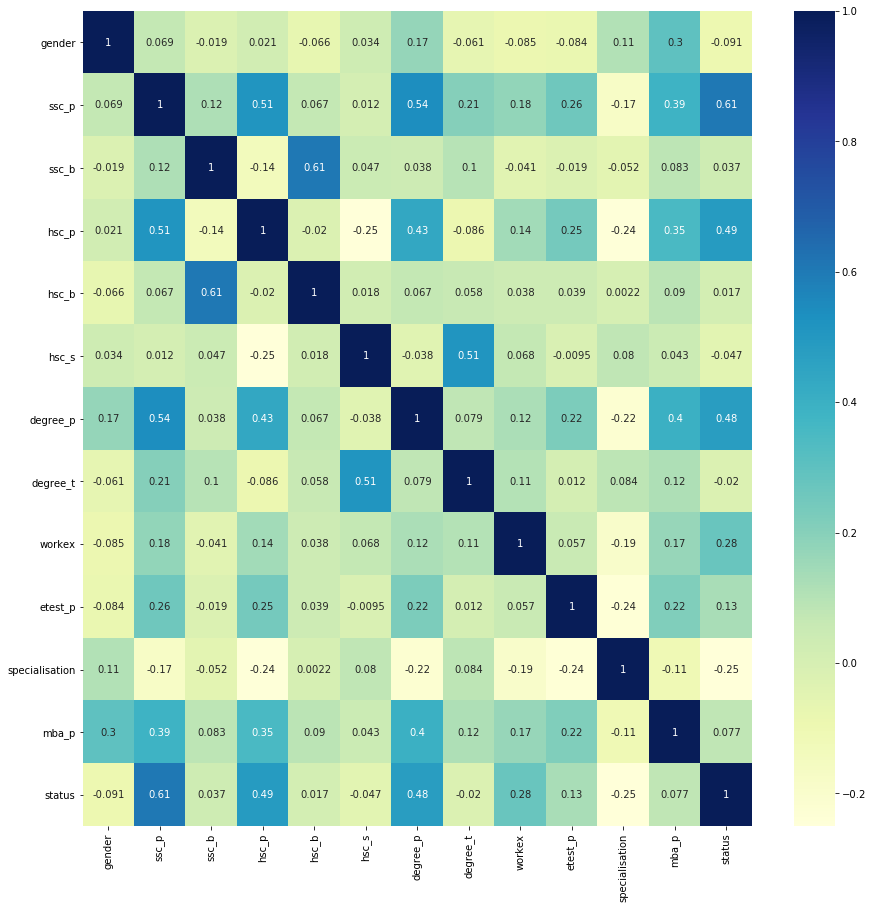

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# The above correlation map tells us that the job offered highly depends upon
# SSC Percentage

# Most of the jobs offered after MBA are of Specialization Mkt & Fin

In [16]:
pd.crosstab(df.specialisation,df.status) #Baseline

status,0,1
specialisation,,
0,25,95
1,42,53


In [17]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,0.460465,66.333163,0.609302,0.525581,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.594403,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,0.000000,67.000000,0.000000,65.000000,1.000000,0.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,1.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


In [18]:
"""
Above description tells us the following.
1) Salary column contains outliers.
2) Salary column contains null values.
3) Avg Salary is 288655
4) Only 25% of students got salary above 300000
5) Max Salary is 940000 and it's male.
6) Gender column contains Male-65% and Female-35%
7) Highest percentage marks in MBA and etest_p  is received by a female candidate.

"""

"\nAbove description tells us the following.\n1) Salary column contains outliers.\n2) Salary column contains null values.\n3) Avg Salary is 288655\n4) Only 25% of students got salary above 300000\n5) Max Salary is 940000 and it's male.\n6) Gender column contains Male-65% and Female-35%\n7) Highest percentage marks in MBA and etest_p  is received by a female candidate.\n\n"

In [19]:
# Creating a cleaned csv file with columns which has impact on status column.

In [20]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

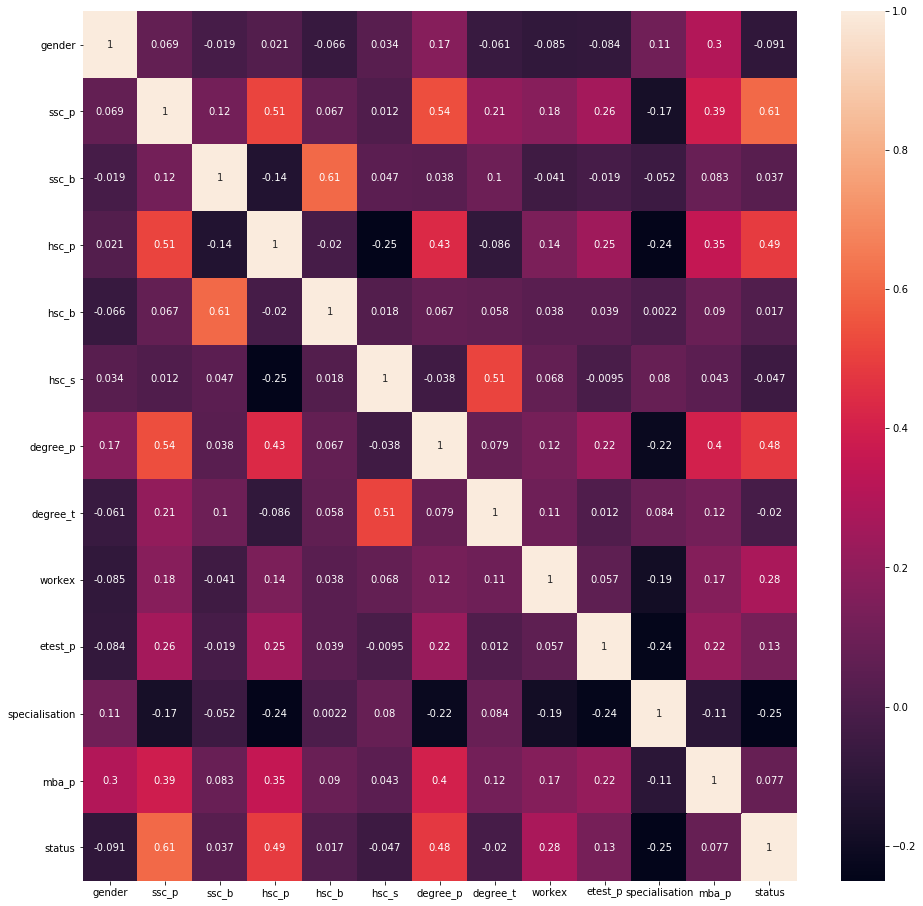

In [21]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

In [22]:
print('Preprocessed csv created Successfully')

Preprocessed csv created Successfully


In [23]:
df.drop(['ssc_b','hsc_b','hsc_s','degree_t','etest_p','specialisation'],axis=1,inplace=True)

In [24]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,mba_p,status
0,0,67.00,91.00,58.00,0,58.80,1
1,0,79.33,78.33,77.48,1,66.28,1
2,0,65.00,68.00,64.00,0,57.80,1
3,0,56.00,52.00,52.00,0,59.43,0
4,0,85.80,73.60,73.30,0,55.50,1


In [25]:
df.to_csv('cleaned_placement.csv',index=False)

In [26]:
pd.read_csv('cleaned_placement.csv')

,gender,ssc_p,hsc_p,degree_p,workex,mba_p,status
0,0,67.00,91.00,58.00,0,58.80,1
1,0,79.33,78.33,77.48,1,66.28,1
2,0,65.00,68.00,64.00,0,57.80,1
3,0,56.00,52.00,52.00,0,59.43,0
4,0,85.80,73.60,73.30,0,55.50,1
...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,0,74.49,1
211,0,58.00,60.00,72.00,0,53.62,1
212,0,67.00,67.00,73.00,1,69.72,1
213,1,74.00,66.00,58.00,0,60.23,1
